In [1]:
import random
import time
random.seed(42)
#import json

In [2]:
spec_no_data = {
    "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
    "mark": "point",

    "encoding": {
        "x": {"type": "quantitative", "field": "x"},
        "y": {"type": "quantitative", "field": "y"},
    }
}

spec_with_data = spec_no_data.copy()
spec_with_data["datasets"] = {
    "foo": [
        {"x": random.gauss(0, 1), "y": random.gauss(0, 1), "t": t}
        for t in range(5)
    ],
}
spec_with_data["data"] = {
        "name": "foo"
    }
#print(json.dumps(spec_with_data, indent=2))

# Static Vega Plot

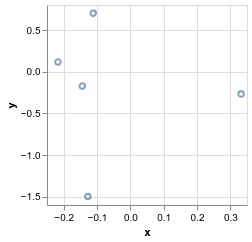

In [3]:
from vega import VegaLite
VegaLite(spec=spec_with_data)

# Vega Plot with dynamic updates

The widget allows to update the plot after it has been displayed. To do so, the widget offers the `update` method that allows to add or remove data from the plot.

In [4]:
from vega.widget import VegaWidget
my_spec_no_data = spec_no_data.copy()
# cf. https://vega.github.io/vega-lite/docs/data.html#datasets
my_spec_no_data["datasets"] = {
    "foo": []
}
my_spec_no_data["data"] = {
        "name": "foo"
}
widget = VegaWidget(spec=my_spec_no_data)


values = [
    dict(
        x=random.gauss(0.0, 1.0),
        y=random.gauss(0.0, 1.0),
        t=0,
    )
    for _ in range(10)
]
display(widget)
widget.update('foo', insert=values)

VegaWidget()

## Dynamic updates using ipytablewidgets when insert argument is  a dataframe

In [5]:
import pandas as pd
from vega.widget import VegaWidget

widget = VegaWidget(spec=my_spec_no_data)
xcol = [d['x'] for d in values]
ycol = [d['y'] for d in values]
df = pd.DataFrame(dict(x=xcol, y=ycol), dtype='float32')
display(widget)
widget.update('foo', insert=df)

VegaWidget()

In [6]:
# The spec can be updated after the widget has been displayed. However, any 
# data is inserted via update is lost and needs to be re-inserted.
widget.spec = dict(my_spec_no_data, mark="line")
widget.update("foo", insert=values)

In [7]:
# Similarly the options can be updated after the widget has been displayed. 
# Again, any data is inserted via update is lost and needs to be re-inserted.
widget.opt = {"theme": "dark"}
widget.update("foo", insert=values)

In [8]:
print("the current spec:", widget.spec)
print("options:", widget.opt)

the current spec: {'$schema': 'https://vega.github.io/schema/vega-lite/v4.json', 'mark': 'line', 'encoding': {'x': {'type': 'quantitative', 'field': 'x'}, 'y': {'type': 'quantitative', 'field': 'y'}}, 'datasets': {'foo': []}, 'data': {'name': 'foo'}}
options: {'theme': 'dark'}


The VegaWidget can also be embedded into larger ipywidgets layout and use interactive features, such as buttons or similar interactive elements.

In [9]:
from ipywidgets import VBox, Label, Button

In [10]:
plot = VegaWidget(spec=spec_with_data)
button = Button(description="Add new data point")

t = 5

@button.on_click
def on_click_handler(*_):
    global t
    
    value = dict(
        x=random.gauss(0.0, 1.0),
        y=random.gauss(0.0, 1.0),
        t=t,
    )
    plot.update('foo', insert=[value], remove=f'datum.t <= {t - 5}')
    t += 1

VBox([Label("Vega plot embedded in another widget"), plot, button])

# Errors

In [16]:
from vega.widget import VegaWidget

widget = VegaWidget(spec=my_spec_no_data)


values = [
    dict(
        x=random.gauss(0.0, 1.0),
        y=random.gauss(0.0, 1.0),
        t=0,
    )
    for _ in range(10)
]

display(widget)
widget.update('non_existing', insert=values)

VegaWidget()

In [17]:
import pandas as pd
df = pd.DataFrame(dict(a=[1,2], b=[3,4], x=[1.1,2.2],  y=[3.3,4.4]))
widget.update('foo', insert=df)